<a href="https://colab.research.google.com/github/suprabhathk/FoundationalModels_TimeSeries_Epidemics/blob/main/Chronos_FoundationalModels_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing dependencies**

In [1]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-ux_9ta0y
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-ux_9ta0y
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 73d6c9aa1aba42612d99f13fc9365ff7f39c4335
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

## **1. Loading the timeseries dataset from Influcast**

In [2]:
# Importing dependencies for data import
import pandas as pd
import requests
from io import StringIO

In [3]:
def get_last_available_week_data(year):
    """
    Try to get the last available weekly data for a season by checking weeks in reverse order
    """
    base_url = "https://raw.githubusercontent.com/Predizioni-Epidemiologiche-Italia/Influcast/main/sorveglianza/ILI"
    season = f"{year}-{year+1}"

    # Try weeks in reverse order for the second year (most likely to have the final data)
    for week in range(20, 0, -1):  # Try weeks 20 down to 1
        file_name = f"italia-{year+1}_{week:02d}-ILI.csv"
        url = f"{base_url}/{season}/{file_name}"

        try:
            df = pd.read_csv(url)
            print(f"Found data for {season} at week {week} of {year+1}")
            return df
        except:
            continue

    # If not found, try end weeks of first year
    for week in range(53, 39, -1):  # Try weeks 53 down to 40
        file_name = f"italia-{year}_{week:02d}-ILI.csv"
        url = f"{base_url}/{season}/{file_name}"

        try:
            df = pd.read_csv(url)
            print(f"Found data for {season} at week {week} of {year}")
            return df
        except:
            continue

    print(f"No data found for season {season}")
    return None

In [4]:
def get_latest_data(year):
    """Helper function to get latest format data (for 2023 onwards)"""
    base_url = "https://raw.githubusercontent.com/Predizioni-Epidemiologiche-Italia/Influcast/main/sorveglianza/ILI"
    season = f"{year}-{year+1}"
    url = f"{base_url}/{season}/latest/italia-latest-ILI.csv"

    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        print(f"Error importing {season}: {str(e)}")
        return None


In [5]:
def import_flu_data(start_year=2003, end_year=2024):
    """
    Import flu data from GitHub repository:
    - For 2003-2022: Gets last available weekly data
    - For 2023 onwards: Gets latest format data
    """
    all_dfs = []

    # Handle older years (2003-2022)
    for year in range(start_year, 2023):
        print(f"\nProcessing {year}-{year+1} season...")
        df = get_last_available_week_data(year)
        if df is not None:
            print(f"Entries found: {len(df)}")
            all_dfs.append(df)

    # Handle newer years with latest format (2023-2025)
    for year in range(2023, end_year + 1):
        print(f"\nProcessing {year}-{year+1} season (latest format)...")
        df = get_latest_data(year)
        if df is not None:
            print(f"Entries found: {len(df)}")
            all_dfs.append(df)

    # Combine all data
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        print(f"\nFinal dataset shape: {combined_df.shape}")
        return combined_df
    else:
        raise ValueError("No data was successfully imported")

In [6]:
# Import all data
try:
    df_influcast = import_flu_data()
except Exception as e:
    print(f"Error: {str(e)}")


Processing 2003-2004 season...
Found data for 2003-2004 at week 17 of 2004
Entries found: 28

Processing 2004-2005 season...
Found data for 2004-2005 at week 16 of 2005
Entries found: 28

Processing 2005-2006 season...
Found data for 2005-2006 at week 17 of 2006
Entries found: 28

Processing 2006-2007 season...
Found data for 2006-2007 at week 17 of 2007
Entries found: 28

Processing 2007-2008 season...
Found data for 2007-2008 at week 17 of 2008
Entries found: 28

Processing 2008-2009 season...
Found data for 2008-2009 at week 17 of 2009
Entries found: 28

Processing 2009-2010 season...
Found data for 2009-2010 at week 15 of 2010
Entries found: 27

Processing 2010-2011 season...
Found data for 2010-2011 at week 17 of 2011
Entries found: 28

Processing 2011-2012 season...
Found data for 2011-2012 at week 17 of 2012
Entries found: 28

Processing 2012-2013 season...
Found data for 2012-2013 at week 17 of 2013
Entries found: 28

Processing 2013-2014 season...
Found data for 2013-2014 at 

In [7]:
df_influcast

,anno,settimana,incidenza,numero_casi,numero_assistiti,target
0,2003,42,0.360000,357,1000656,ILI
1,2003,43,0.470000,500,1066723,ILI
2,2003,44,0.520000,597,1150866,ILI
3,2003,45,0.600000,723,1204797,ILI
4,2003,46,0.590000,742,1251026,ILI
...,...,...,...,...,...,...
597,2024,52,10.507239,23238,2211618,ILI
598,2025,1,12.355276,27339,2212739,ILI
599,2025,2,14.768421,32995,2234159,ILI
600,2025,3,15.888903,33734,2123117,ILI


In [9]:
df_chronos = df_influcast.copy()
df_chronos['timestamp'] = pd.to_datetime(df_chronos['anno'].astype(str) + '-' + df_chronos['settimana'].astype(str) + '-1', format='%Y-%W-%w').dt.to_period('W').dt.to_timestamp()
df_chronos = df_chronos[['timestamp', 'incidenza']].rename(columns={'incidenza': 'target'})
df_chronos['item_id'] = 'ILI'

df_chronos

,timestamp,target,item_id
0,2003-10-20,0.360000,ILI
1,2003-10-27,0.470000,ILI
2,2003-11-03,0.520000,ILI
3,2003-11-10,0.600000,ILI
4,2003-11-17,0.590000,ILI
...,...,...,...
597,2024-12-23,10.507239,ILI
598,2025-01-06,12.355276,ILI
599,2025-01-13,14.768421,ILI
600,2025-01-20,15.888903,ILI


In [35]:
# Create training data excluding last 4 entries
train_data = df_chronos["target"][:-3]  # All data except last 4 entries
test_data = df_chronos["target"][-3:]   # Last 4 entries for comparison

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map = torch.device("mps" if torch.backends.mps.is_available() else "cpu"), # You can switch this to CPU or other GPUs if you'd like, depending on your environment",
  torch_dtype=torch.bfloat16,
)

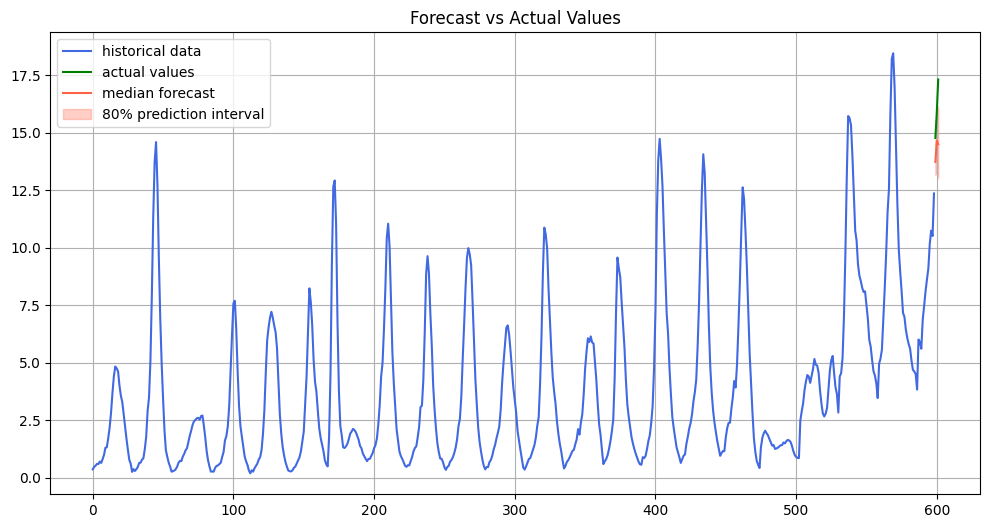

In [38]:
# Convert to tensor and generate forecast
context = torch.tensor(train_data.values)
prediction_length = 3  # Now forecasting 4 steps
forecast = pipeline.predict(context, prediction_length)

# Get forecast quantiles
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(range(len(train_data)), train_data, color="royalblue", label="historical data")

# Plot test data
plt.plot(range(len(train_data), len(train_data) + len(test_data)),
         test_data, color="green", label="actual values")

# Plot forecast
forecast_index = range(len(train_data), len(train_data) + prediction_length)
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3,
                 label="80% prediction interval")

plt.legend()
plt.grid(True)
plt.title("Forecast vs Actual Values")
plt.show()



In [39]:
# Print the shape of the forecast tensor
print("Forecast tensor shape:", forecast.shape)

# Convert the forecast array to numpy for easier manipulation
forecast_np = forecast[0].numpy()

# Get the forecast statistics for each time step
low, median, high = np.quantile(forecast_np, [0.1, 0.5, 0.9], axis=0)

# Create a DataFrame with the forecast values
forecast_df = pd.DataFrame({
    'Period': range(1, prediction_length + 1),
    'Low (10%)': low,
    'Median (50%)': median,
    'High (90%)': high
})

# Display the forecast values
print("\nDetailed forecast values:")
print(forecast_df)

# Print some basic statistics
print("\nForecast Statistics:")
print(f"Average prediction (median): {median.mean():.2f}")
print(f"Minimum prediction (10th percentile): {low.min():.2f}")
print(f"Maximum prediction (90th percentile): {high.max():.2f}")

# You can also look at all samples for a specific time period
print("\nAll forecast samples for first time step:")
print(forecast_np[:, 0])  # All samples for the first predicted time step

Forecast tensor shape: torch.Size([1, 20, 3])

Detailed forecast values:
   Period  Low (10%)  Median (50%)  High (90%)
0       1  13.155707     13.726145   14.237161
1       2  13.336940     14.647162   15.889052
2       3  13.019040     14.498611   16.138619

Forecast Statistics:
Average prediction (median): 14.29
Minimum prediction (10th percentile): 13.02
Maximum prediction (90th percentile): 16.14

All forecast samples for first time step:
[13.25078   13.607303  13.1913595 13.963827  13.785565  13.102229
 14.231219  13.221069  13.726145  14.290639  13.844986  13.666724
 13.726145  14.231219  14.37977   13.102229  13.161649  13.934116
 13.4884615 13.755855 ]


In [40]:
# Print comparison metrics
print("\nComparison of forecast vs actual values:")
comparison_df = pd.DataFrame({
    'Period': range(1, prediction_length + 1),
    'Actual': test_data.values,
    'Forecast (Median)': median,
    'Lower Bound': low,
    'Upper Bound': high
})
print(comparison_df)

# Calculate error metrics
mape = np.mean(np.abs((test_data.values - median) / test_data.values)) * 100
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")


Comparison of forecast vs actual values:
   Period     Actual  Forecast (Median)  Lower Bound  Upper Bound
0       1  14.768421          13.726145    13.155707    14.237161
1       2  15.888903          14.647162    13.336940    15.889052
2       3  17.310525          14.498611    13.019040    16.138619

Mean Absolute Percentage Error (MAPE): 10.37%


In [41]:
# Enhanced metrics calculation
def calculate_forecast_metrics(actual, predicted, lower_bound, upper_bound):
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    # RMSE (Root Mean Square Error)
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))

    # MAE (Mean Absolute Error)
    mae = np.mean(np.abs(actual - predicted))

    # Coverage Rate (percentage of actual values within prediction intervals)
    coverage = np.mean((actual >= lower_bound) & (actual <= upper_bound)) * 100

    # Directional Accuracy (percentage of correct direction predictions)
    actual_direction = np.diff(actual) > 0
    pred_direction = np.diff(predicted) > 0
    dir_acc = np.mean(actual_direction == pred_direction) * 100 if len(actual) > 1 else np.nan

    # Mean Prediction Interval Width
    interval_width = np.mean(upper_bound - lower_bound)

    return {
        'MAPE (%)': mape,
        'RMSE': rmse,
        'MAE': mae,
        'Coverage Rate (%)': coverage,
        'Directional Accuracy (%)': dir_acc,
        'Mean Interval Width': interval_width
    }

# Calculate all metrics
metrics = calculate_forecast_metrics(
    actual=test_data.values,
    predicted=median,
    lower_bound=low,
    upper_bound=high
)

# Print results in a formatted way
print("\nForecast Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric:<25}: {value:,.2f}")

# Add normalized metrics to account for scale
print("\nNormalized Metrics:")
data_scale = np.mean(test_data.values)
print(f"{'RMSE (% of mean)':<25}: {(metrics['RMSE'] / data_scale) * 100:,.2f}%")
print(f"{'MAE (% of mean)':<25}: {(metrics['MAE'] / data_scale) * 100:,.2f}%")



Forecast Evaluation Metrics:
MAPE (%)                 : 10.37
RMSE                     : 1.87
MAE                      : 1.70
Coverage Rate (%)        : 33.33
Directional Accuracy (%) : 50.00
Mean Interval Width      : 2.25

Normalized Metrics:
RMSE (% of mean)         : 11.72%
MAE (% of mean)          : 10.62%
